In [1]:
def qZ(x,y):
    return (x - 3 *y)/(2*(x**2)+2*(y**2)+1)


In [2]:
def qsumZ(Z):
    return sum(Z)


In [3]:
def exchangeScheme(oldX, oldY, sortedId): 
    X = [0 for i in range(4)] 
    Y = [0 for i in range(4)]
    X[2] = oldX[sortedId[2]] 
    X[3] = oldX[sortedId[2]]
    X[0] = oldX[sortedId[0]]
    X[1] = oldX[sortedId[1]]
    Y[0] = oldY[sortedId[2]] 
    Y[1] = oldY[sortedId[2]]
    Y[2] = oldY[sortedId[0]]
    Y[3] = oldY[sortedId[1]]
    return X,Y


In [4]:
def sorting(Z):
    sortedId = sorted(range(len(Z)), key = lambda k: Z[k])
    return sortedId



In [5]:
def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z)) 
    X = X[:]
    Y = Y[:]
    Z = Z[:]
    X. pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    return X, Y, Z

In [6]:
def evoSteps(X, Y): 
    results = []
    for i in range(4): 
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]
        X,Y,Z = evoStep(X, Y, arrZ)
        X, Y = exchangeScheme(X, Y, sorting(Z))
        results.append([X, Y, qsumZ(arrZ), arrZ])

    return X, Y, results

In [7]:
X = [-1,0,2,3]
Y = [0,1,-2,2]
results = evoSteps(X,Y)

for i in range(len(results[2])):
    print(f'max_{i+1}: {results[2][i][2]}')

qualityArrZ = [] 
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]
print(f'max_Z: {max(qualityArrZ)}')

max_1: -0.9738562091503267
max_2: 0.7748068924539511
max_3: 0.9251336898395722
max_4: 1.7290552584670231
max_Z: 0.47058823529411764


In [60]:
import networkx as nx
from math import e
distances = [(1, 2,19),
            (1, 3, 39),
            (1, 4, 35),
            (1, 5, 26),
            (1, 6, 18),
            (2, 3,26),
            (2, 4, 33),
            (2, 5, 37),
            (2, 6, 14),
            (3, 4, 22),
            (3, 5, 41),
            (3, 6, 21),
            (4, 5, 22),
            (4, 6, 19),
            (5, 6, 24)] # длины рёбер
V = [1, 4, 2,3,5,6,1] # последовательность прохождения маршрута
Z = [(5,2),
    (4, 5),
    (2,3),
    (3,4)] # последовательность замен вершин 
P = [88,54,24,64] # случайные числа, быпавшие в процессе счёта
T = 100 # начальная температура

In [61]:
def probability(delta, T):
     return 100 * e ** (-delta / T)
# функция изменения температуры 
def reductTemp(prevT):
    nextT = 0.5 * prevT
    return nextT

In [62]:
def probability(delta, T):
     return 100 * e ** (-delta / T)
# функция изменения температуры 
def reductTemp(prevT):
    nextT = 0.5 * prevT
    return nextT

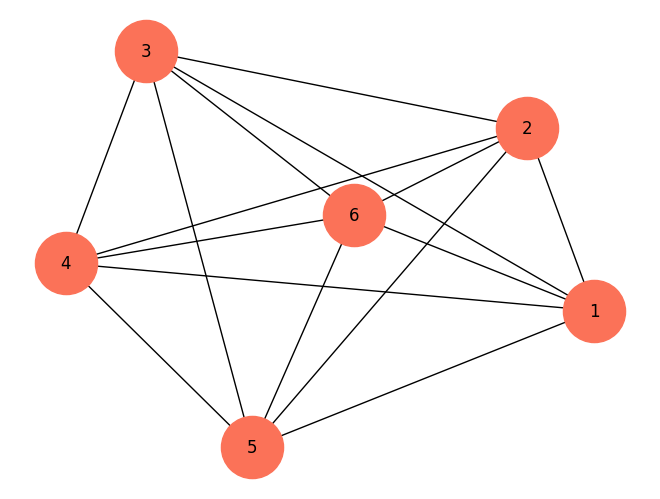

In [63]:
graph = nx.Graph() 
graph.add_weighted_edges_from(distances) 
nx. draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

In [64]:
# вычисление длины ребра
def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0]== i and item[1] == j) or (item[1] == i and item[0] == j) else -1)for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])
    
def routeLength(V, distances): 
    edges = []
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))
    return sum(edges)

def routeOneReplacement(arrV, Z, replacementByName = True): 
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV

In [65]:
# перестановки в пути
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

def chooseRoute(distances, V, Z, T, P): 
    sumLength = routeLength(V, distances) # нахождение длины numa
    arrSum = [sumLength] # массиб сумм длин
# циклы методом отнига 
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) # новый маршрут после перестановки 
        newS = routeLength(newV, distances) # длина нового маршрута
        arrSum.append(newS) 
        deltaS = newS - sumLength # разница между длиной навого и старого маршрутов

        if deltaS > 0: 
            p = probability(deltaS, T) # подсчёт вероятности
# если заданная вероятность попадает в интервал от в до р, то новый маршрут выбирается
            if p > P[i]: 
                V =newV
                sumLength =newS
        else: 
            V=newV
            sumLength =newS
        T = reductTemp(T) # вычисление температуры
    return V, arrSum

def drawRouteGraph(distances, bestRoute):
    newDistances = [] # прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]: 
                newDistances. append(distance)
    graph = nx.Graph() # создание пустого графа
    graph.add_weighted_edges_from(newDistances) # добабление весоб ребер # отрисобка графа с заданными вершинами 
    nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)


Лучший выбранный маршрут: [1, 2, 5, 4, 3, 6, 1]
Длина лучшего выбранного маршрута: 139
Длины всех рассмотренных маршрутов: [177, 148, 157, 139, 154]


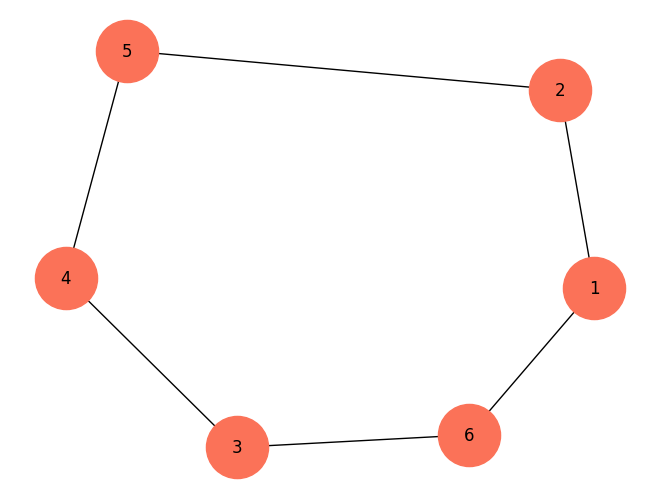

In [66]:

bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print(f'Лучший выбранный маршрут: {bestRoute}') 
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}') 
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph(distances,bestRoute)